In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sys
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
import soundfile as sf
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

## Database Generation from Audio Files

In [ ]:
# Extracting the required features from the audio files
def extract_features(audio, sample_rate):
    features = []
    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    chroma_stft_mean = np.mean(chroma_stft).astype(np.float32)
    chroma_stft_var = np.var(chroma_stft).astype(np.float32)
    features.extend([chroma_stft_mean])
    features.extend([chroma_stft_var])

    # RMS
    rms = librosa.feature.rms(y=audio)
    rms_mean = np.mean(rms).astype(np.float32)
    rms_var = np.var(rms).astype(np.float32)
    features.extend([rms_mean])
    features.extend([rms_var])

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
    spectral_centroid_mean = np.mean(spectral_centroid).astype(np.float32)
    spectral_centroid_var = np.var(spectral_centroid).astype(np.float32)
    features.extend([spectral_centroid_mean])
    features.extend([spectral_centroid_var])

    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth).astype(np.float32)
    spectral_bandwidth_var = np.var(spectral_bandwidth).astype(np.float32)
    features.extend([spectral_bandwidth_mean])
    features.extend([spectral_bandwidth_var])

    # Rolloff
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
    rolloff_mean = np.mean(rolloff).astype(np.float32)
    rolloff_var = np.var(rolloff).astype(np.float32)
    features.extend([rolloff_mean])
    features.extend([rolloff_var])

    # Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate).astype(np.float32)
    zero_crossing_rate_var = np.var(zero_crossing_rate).astype(np.float32)
    features.extend([zero_crossing_rate_mean])
    features.extend([zero_crossing_rate_var])

    # Harmony and Perceptr
    harmony, perceptr = librosa.effects.hpss(audio)
    harmony_mean = np.mean(harmony).astype(np.float32)
    harmony_var = np.var(harmony).astype(np.float32)
    perceptr_mean = np.mean(perceptr).astype(np.float32)
    perceptr_var = np.var(perceptr).astype(np.float32)
    features.extend([harmony_mean])
    features.extend([harmony_var])
    features.extend([perceptr_mean])
    features.extend([perceptr_var])

    # Tempo
    tempo = librosa.feature.rhythm.tempo(y=audio, sr=sample_rate)[0].astype(np.float32)
    features.extend([tempo])

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
    mfcc_means = np.mean(mfccs, axis=1).astype(np.float32)
    mfcc_vars = np.var(mfccs, axis=1).astype(np.float32)

    features.extend(mfcc_means)
    features.extend(mfcc_vars)

    return features

In [ ]:
path = '/content/drive/MyDrive/Music Genre Classifier/genres_original'
dataset = []
y = []

# Parsing the Folders
for i,folder in enumerate(os.listdir(path)):
    for j,file in enumerate(os.listdir(os.path.join(path, folder))):
        print(i,j,file)

        # Read the Audio File
        try:
            data , sample_rate = librosa.load(os.path.join(path, folder, file), sr = 22050)
            data = librosa.effects.trim(data)[0]
        except:
            print("File ::",file,"is corrupt")
            continue

        # Trims the 30 second file into 3 seconds interval
        gap = sample_rate*3
        tempo = librosa.beat.beat_track(y=data, sr = sample_rate)[0]
        for k in np.arange(0,len(data)-gap,gap):
            lower = int(k)
            upper = int(k + gap)

            row = extract_features(data[lower:upper],sample_rate)
            dataset.append(np.array(row))
            y.append(folder)

y = pd.DataFrame(y)

0 0 reggae.00005.wav
0 1 reggae.00001.wav
0 2 reggae.00012.wav
0 3 reggae.00009.wav
0 4 reggae.00004.wav
0 5 reggae.00003.wav
0 6 reggae.00008.wav
0 7 reggae.00010.wav
0 8 reggae.00000.wav
0 9 reggae.00002.wav
0 10 reggae.00007.wav
0 11 reggae.00011.wav
0 12 reggae.00026.wav
0 13 reggae.00018.wav
0 14 reggae.00021.wav
0 15 reggae.00016.wav
0 16 reggae.00024.wav
0 17 reggae.00014.wav
0 18 reggae.00027.wav
0 19 reggae.00013.wav
0 20 reggae.00023.wav
0 21 reggae.00025.wav
0 22 reggae.00017.wav
0 23 reggae.00019.wav
0 24 reggae.00020.wav
0 25 reggae.00015.wav
0 26 reggae.00022.wav
0 27 reggae.00039.wav
0 28 reggae.00036.wav
0 29 reggae.00033.wav
0 30 reggae.00029.wav
0 31 reggae.00030.wav
0 32 reggae.00031.wav
0 33 reggae.00038.wav
0 34 reggae.00041.wav
0 35 reggae.00040.wav
0 36 reggae.00028.wav
0 37 reggae.00034.wav
0 38 reggae.00032.wav
0 39 reggae.00035.wav
0 40 reggae.00037.wav
0 41 reggae.00047.wav
0 42 reggae.00050.wav
0 43 reggae.00051.wav
0 44 reggae.00052.wav
0 45 reggae.00043.wa

In [ ]:
columns = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

dataset = pd.DataFrame(dataset,columns=columns)
dataset['label'] = y
dataset.to_csv("/content/drive/MyDrive/Music Genre Classifier/features.csv")

# EDA

Correlation Heatmap

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Music Genre Classifier/features.csv')

In [ ]:
columns_mean = [column for column in df.columns if 'mean' in column]
corr_mean = df[columns_mean].corr()

columns_var = [column for column in df.columns if 'var' in column]
corr_var = df[columns_var].corr()

plt.figure(figsize=(15, 24))

plt.subplot(2, 1, 1)
plt.title('Correlation Heatmap (Mean Columns)')
sns.heatmap(corr_mean, square=True, linewidths=.5, cmap="magma")

plt.subplot(2, 1, 2)
plt.title('Correlation Heatmap (Variance Columns)')
sns.heatmap(corr_var, square=True, linewidths=.5, cmap="inferno")
plt.savefig('/content/drive/MyDrive/Music Genre Classifier/heatmap.png')

plt.tight_layout()
plt.show()

BoxPlot

In [ ]:
# Since tempo is alone without any mean and var hence we check for the outliers
x = dataset[["label", "tempo"]]
color = {"blues":"b","classical":"c","country":"o","disco":"r","hiphop":"t","jazz":"p","metal":"g","pop":"v","reggae":"y","rock":"w"}
f, ax = plt.subplots(figsize=(15, 10));
sns.boxplot(x = "label", y = "tempo", data = x, palette = "icefire");

plt.title('BPM Boxplot for Genres')
plt.savefig("/content/drive/MyDrive/Music Genre Classifier/BPM Boxplot.jpg")

PCA in Scatter Plot

In [ ]:
pca = PCA()
pca.fit(df.drop(['Unnamed: 0', 'label'], axis=1))

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Elbow Method for Optimal Number of Components')
plt.grid()
plt.savefig("/content/drive/MyDrive/Music Genre Classifier/Elbow_Variance.jpg")
plt.show()

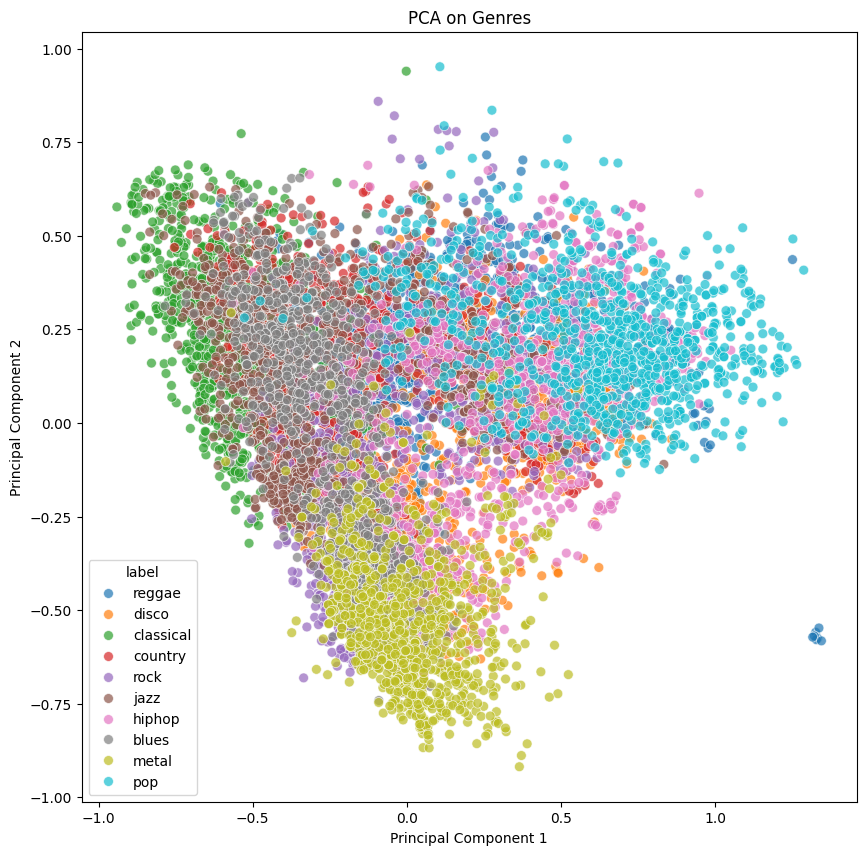

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

y = dataset['label']
X = dataset.drop(columns='label')

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(X), columns = ['Principal Component 1', 'Principal Component 2'])

final_df = pd.concat([df_pca, y], axis = 1)

plt.figure(figsize = (10,10))
sns.scatterplot(x = "Principal Component 1", y = "Principal Component 2", data = final_df, hue = "label", alpha = 0.7, s = 50);
plt.title('PCA on Genres')
plt.savefig("/content/drive/MyDrive/Music Genre Classifier/PCA Scatter.jpg")

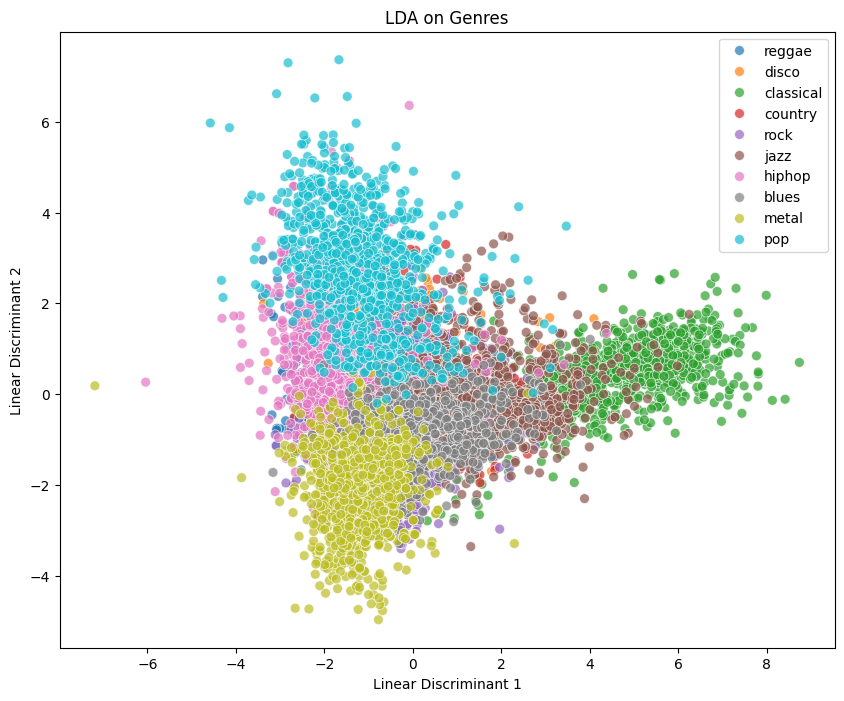

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Fit LDA model
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a new dataframe with the LDA components and the original labels
final_df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
final_df_lda['label'] = y

# Plot the LDA graph
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='label', data=final_df_lda, alpha=0.7, s=50)
plt.title('LDA on Genres')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.savefig("/content/drive/MyDrive/Music Genre Classifier/LDA Scatter.jpg")
plt.show()

## Preprocessing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Music Genre Classifier/features.csv')

In [ ]:
# df.head()

In [ ]:
X = df.drop(columns=['label','Unnamed: 0'])

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
# X_train.head()

## Models

In [ ]:
from sklearn.model_selection import cross_val_score as cv
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=10000)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Logistic Regression: {max(cv_scores)}")

CV Score for Logistic Regression: 0.45517241379310347


**SGDClassifier**

In [ ]:
model = SGDClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for SGDClassifier: {max(cv_scores)}")

CV Score for SGDClassifier: 0.21379310344827587


**Support Vector Machine**

In [ ]:
model = SVC()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for SVC: {max(cv_scores)}")

CV Score for SVC: 0.2940438871473354


**KNN**

In [ ]:
model = KNeighborsClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for KNN: {max(cv_scores)}")

CV Score for KNN: 0.27899686520376177


**Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Gaussian Naive Bayes: {max(cv_scores)}")

CV Score for Gaussian Naive Bayes: 0.42570532915360504


**Decision Tree**

In [ ]:
model = DecisionTreeClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Decision Tree: {max(cv_scores)}")

CV Score for Decision Tree: 0.6746081504702194


**AdaBoost**

In [ ]:
model = AdaBoostClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for AdaBoost: {max(cv_scores)}")

CV Score for AdaBoost: 0.47774294670846396


**XG Boost**

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for XGBoost: {max(cv_scores)}")

CV Score for XGBoost: 0.9028213166144201


**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Random Forest: {max(cv_scores)}")

CV Score for Random Forest: 0.8677115987460815


**Light GBM**

In [ ]:
model = LGBMClassifier(verbose=-1, force_col_wise=True)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Light GBM: {max(cv_scores)}")

CV Score for Light GBM: 0.9084639498432602


**MLP Classifier**

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(54, 54,), max_iter=1000)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"CV Score for Neural Network: {max(cv_scores)}")

CV Score for Neural Network: 0.2927899686520376


## Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':range(9, 16),'learning_rate':np.arange(0.15,0.3,0.02),'path_smooth':range(20,40,4),'max_bin':range(75,150,5)}
model = LGBMClassifier(verbose=-1, force_col_wise=True)
clf = RandomizedSearchCV(model, parameters,cv=5)
clf.fit(X_train,y_train)
clf.best_params_

{'path_smooth': 24,
 'max_depth': 13,
 'max_bin': 105,
 'learning_rate': 0.22999999999999995}

In [ ]:
from sklearn.metrics import accuracy_score

model = LGBMClassifier(max_depth=15, learning_rate=0.23, path_smooth=20, max_bin=90, verbose=-1, force_col_wise=True)
model.fit(X_train,y_train)
ans = model.predict(X_test)
print(accuracy_score(y_test,ans))

0.9242728184553661


In [ ]:
joblib.dump(model, '/content/drive/MyDrive/Music Genre Classifier/classifier.pkl')
joblib.dump(le, '/content/drive/MyDrive/Music Genre Classifier/encoder.pkl')

['/content/drive/MyDrive/Music Genre Classifier/encoder.pkl']

In [ ]:
print(accuracy_score(y_train,model.predict(X_train)))

0.9993730407523511


## Function for prediction

In [ ]:
model_file = "/content/drive/MyDrive/Music Genre Classifier/classifier.pkl"
label_encoder = "/content/drive/MyDrive/Music Genre Classifier/encoder.pkl"

def Genre_Classifier(path):
    audio_data , sample_rate = librosa.load(path)
    audio_data = librosa.effects.trim(audio_data)[0]

    features = []
    divided = sample_rate * 3
    for k in np.arange(0,len(audio_data)-divided, divided):
        lower = int(k)
        upper = int(k + gap)

        feature_row = extract_features(audio_data[lower:upper], sample_rate)
        features.append(np.array(feature_row))

    features = pd.DataFrame(features)

    classifier = joblib.load(model_file)
    result = classifier.predict(features)

    decode = joblib.load(label_encoder)
    return decode.inverse_transform([pd.DataFrame(result).mode()[0][0]])[0]

Genre_Classifier('/content/drive/MyDrive/Music Genre Classifier/genres_original/metal/metal.00002.wav')

'metal'

In [ ]:
ipd.Audio('/content/drive/MyDrive/Music Genre Classifier/genres_original/metal/metal.00002.wav')

# Visualising Data from .csv Files

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Music Genre Classifier/features.csv')
dataset.head()

Unnamed: 0  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0           0          0.371996         0.094771  0.119312  0.002041   
1           1          0.361428         0.093255  0.077241  0.001430   
2           2          0.369063         0.088062  0.096702  0.003273   
3           3          0.347776         0.097317  0.090096  0.001756   
4           4          0.395953         0.090623  0.098669  0.002703   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1669.7229              268844.78                1892.2030   
1               1979.3600              578094.80                1995.8652   
2               1795.6483              396537.75                2033.8197   
3               1720.3442              435759.80                1907.6179   
4               1801.3828              416178.88                2030.0435   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0               113826.83     3480.5938  ...   81.958084    67.767160   
1               217865.40     4020.7458  ...   83.780680    84.249640   
2               140256.69     3867.2805  ...  106.839600   102.944050   
3               210160.06     3682.8403  ...   74.509254    80.833590   
4               182957.95     3885.6665  ...  108.745370    59.134556   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   64.290570    78.561530   61.911760    47.395042   45.834480    47.537914   
1   81.677010    85.428955  123.897700    87.185470  132.234380    97.160126   
2   49.444485    63.485405   80.357315   118.186104   45.651764   107.591750   
3  137.988770    79.600330   90.198425    53.904026   85.062140    64.170790   
4   46.437440    58.043255   48.349525    72.342285   37.272205    59.778603   

   mfcc20_var   label  
0    49.34677  reggae  
1   126.51908  reggae  
2    66.49343  reggae  
3    72.62102  reggae  
4    73.43056  reggae  

[5 rows x 59 columns]

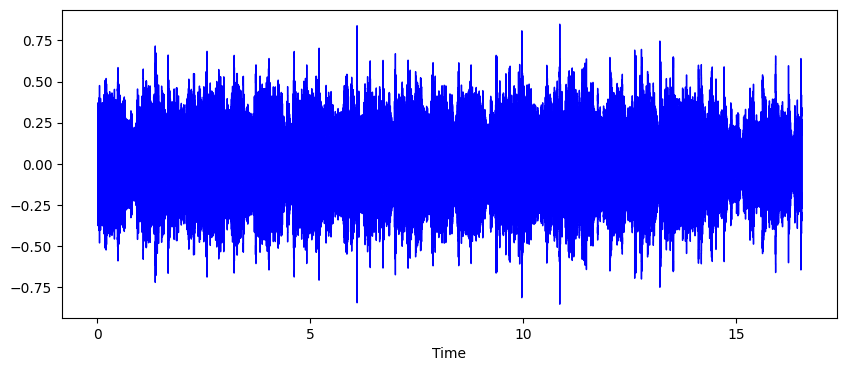

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Music Genre Classifier/genres_original/metal/metal.00002.wav')
plt.figure(figsize = (10, 4))
librosa.display.waveshow(x, sr=sr, color='b')

A function is needed to convert a time-domain signal into frequency-domain with Decibel scaling for both frequency and amplitude axes. This will make it easier to understand the signal's frequency components and their amplitudes.

Text(0.5, 1.0, 'Short-time Fourier Transform')

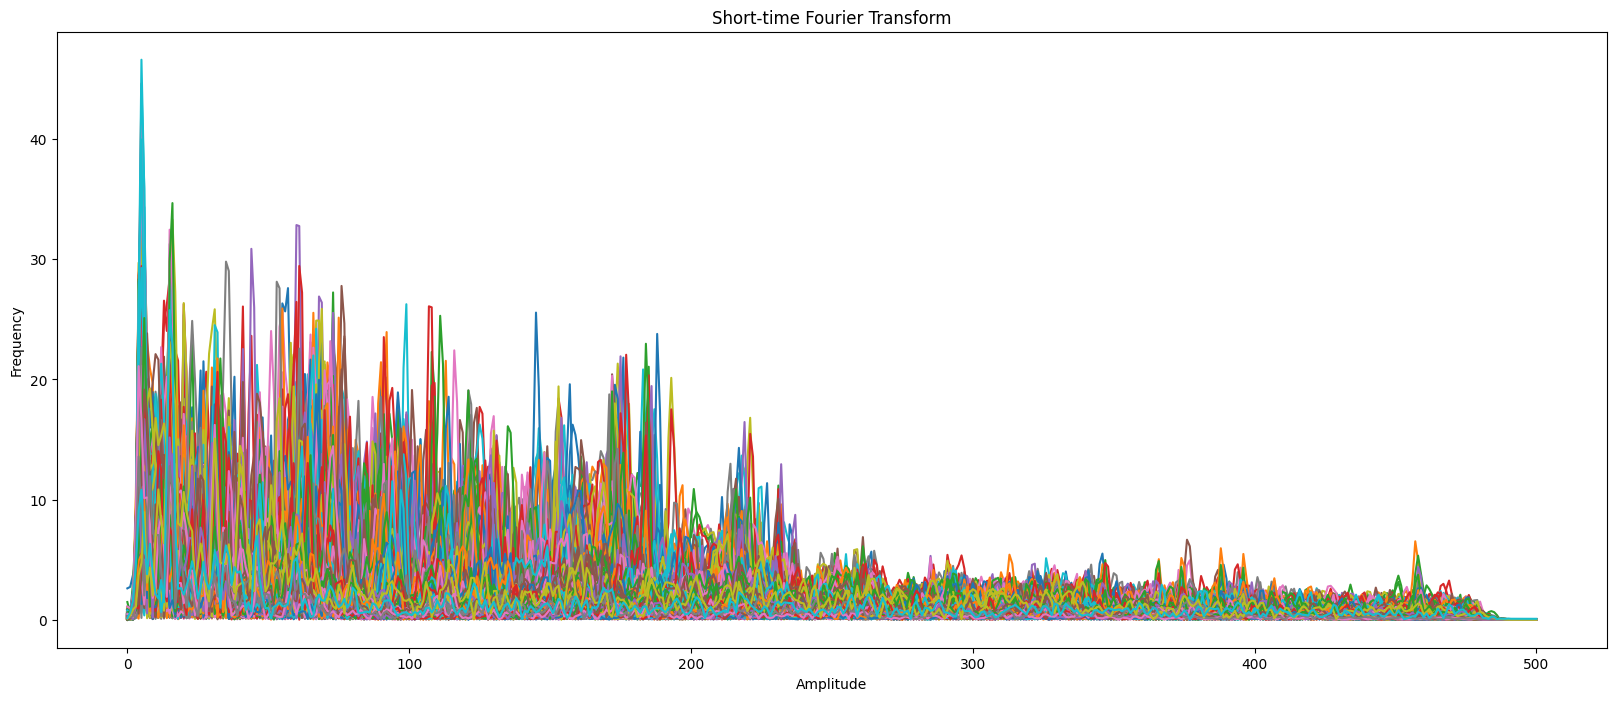

In [ ]:
audio_file, _ = librosa.effects.trim(x)

fft_wsize = 1000
audio_fr = 500 # Number of audio frames between STFT columns
fourier = np.abs(librosa.stft(audio_file, n_fft=fft_wsize, hop_length=audio_fr))

plt.figure(figsize = (20, 8))
plt.plot(fourier);  #Fourier transform plot
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.title("Short-time Fourier Transform")

Converting an amplitude spectrogram to decibels-scaled spectrogram.

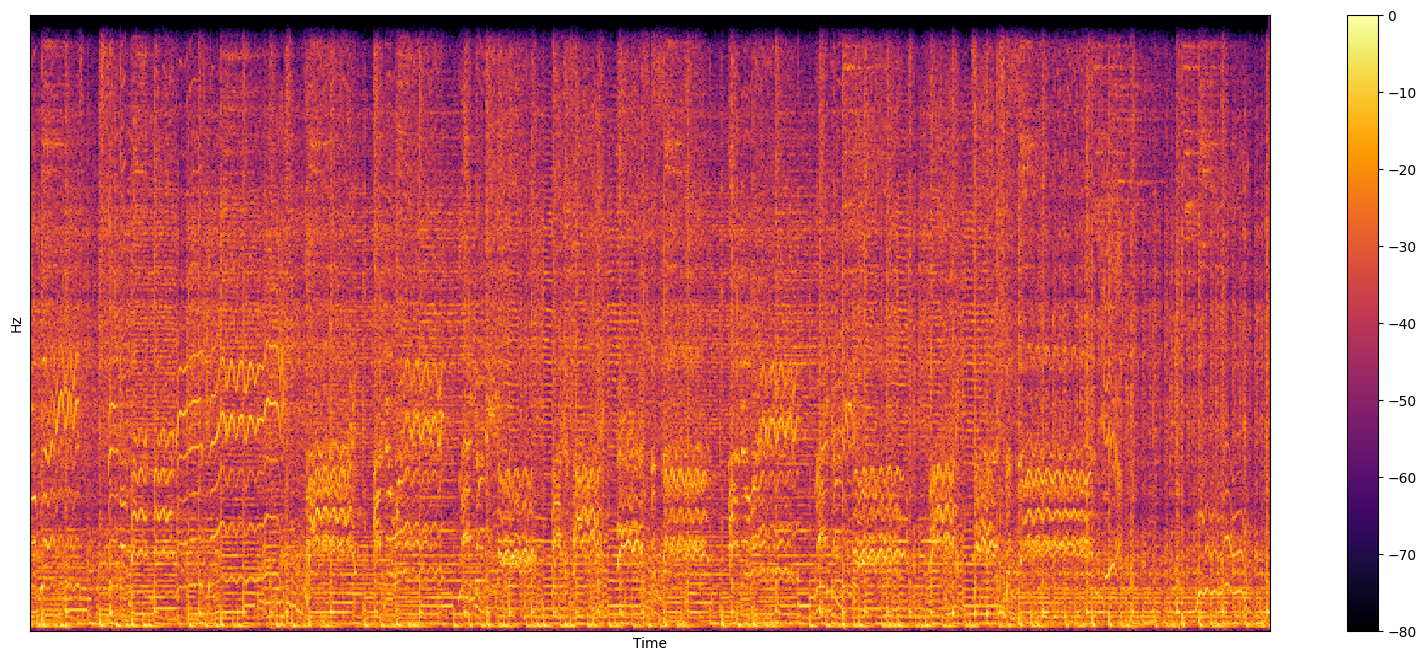

In [ ]:
Decibel = librosa.amplitude_to_db(fourier, ref=np.max)
plt.figure(figsize = (20, 8))
librosa.display.specshow(Decibel, sr=sr, hop_length=audio_fr, cmap="inferno")
plt.xlabel("Time")
plt.ylabel("Hz")
plt.colorbar();

Harmonics give sound its unique color, while rhythm and emotion are perceived through the shock wave.


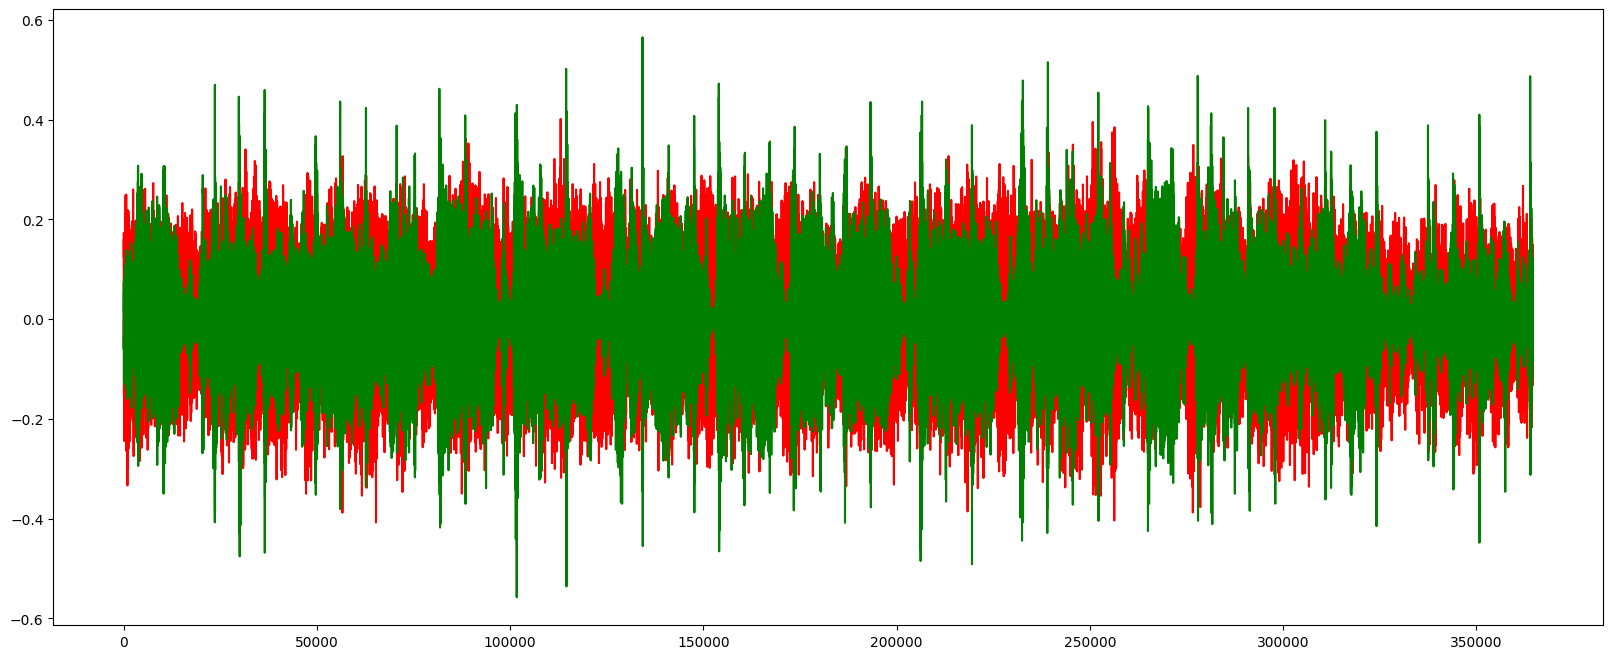

In [ ]:
y_harm, y_per = librosa.effects.hpss(audio_file)
plt.figure(figsize = (20, 8))
plt.plot(y_harm, color = 'r');
plt.plot(y_per, color = 'g');

Chroma features are a cool way to represent music. They condense the full range of sounds into just 12 bins, each one representing a different musical note. It's like taking all the colors in a painting and breaking them down into 12 basic shades.

Text(0, 0.5, 'Chroma')

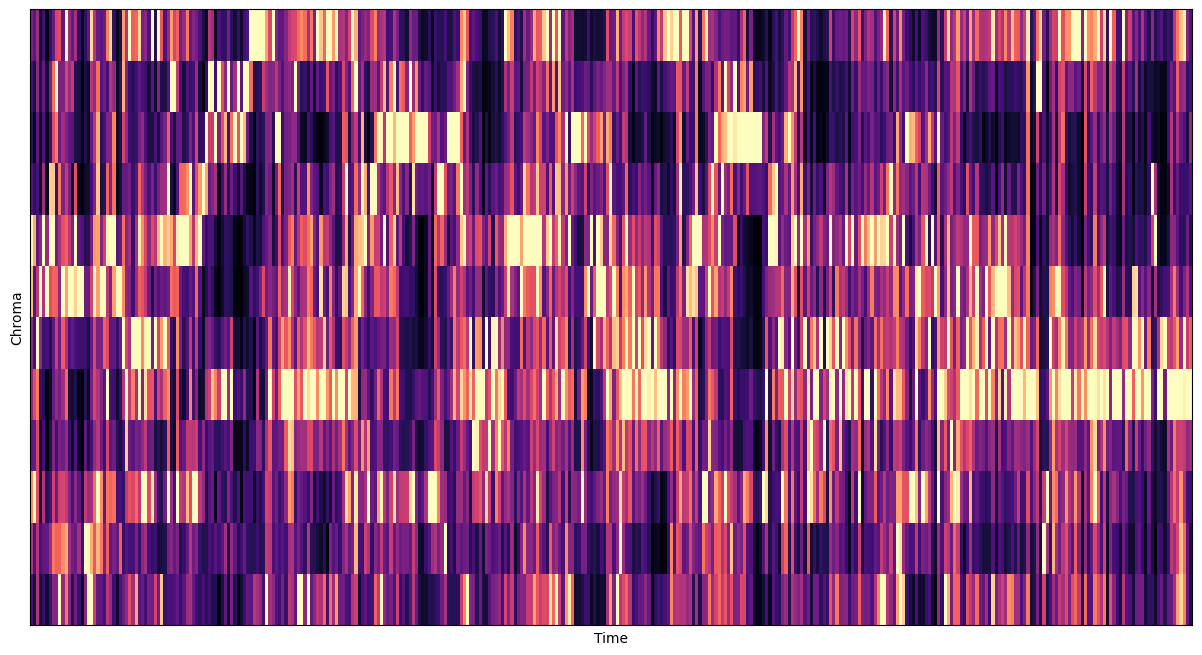

In [ ]:
hop_length = 1000
chroma_stft = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 8))
librosa.display.specshow(chroma_stft, hop_length=hop_length, cmap='magma');
plt.xlabel("Time")
plt.ylabel("Chroma")

MFCCs are like a summary of a sound's shape, usually made up of 10 to 20 key points. They're kind of like a snapshot that captures the main features of how we hear sounds, similar to how we understand human speech.


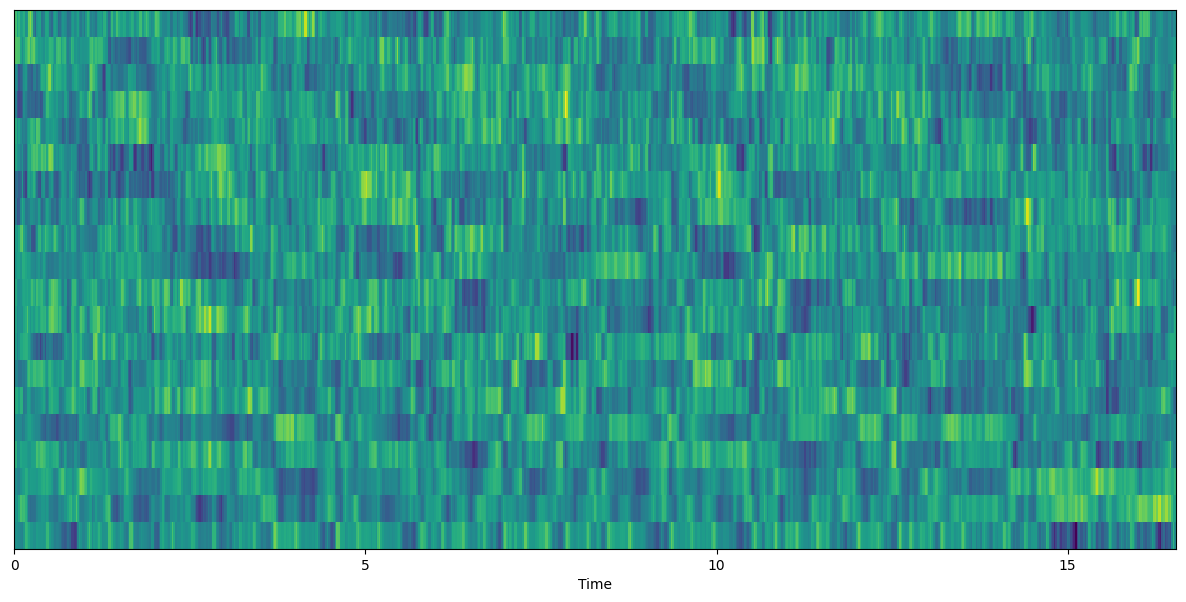

In [ ]:
from sklearn.preprocessing import scale

mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
mfccs = scale(mfccs, axis=1)
plt.figure(figsize = (15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='viridis');

In [ ]:
sf.write('/content/drive/MyDrive/Music Genre Classifier/genres_original/metal/metal.00002.wav', x, 40000, 'PCM_24')

In [ ]:
ipd.Audio('/content/drive/MyDrive/Music Genre Classifier/genres_original/metal/metal.00002.wav')

In [ ]:
librosa.load('/content/drive/MyDrive/Music Genre Classifier/genres_original/metal/metal.00002.wav', sr=45600)

(array([-0.03816113, -0.11538695, -0.05265407, ...,  0.08279693,
         0.04566634, -0.01489966], dtype=float32),
 45600)

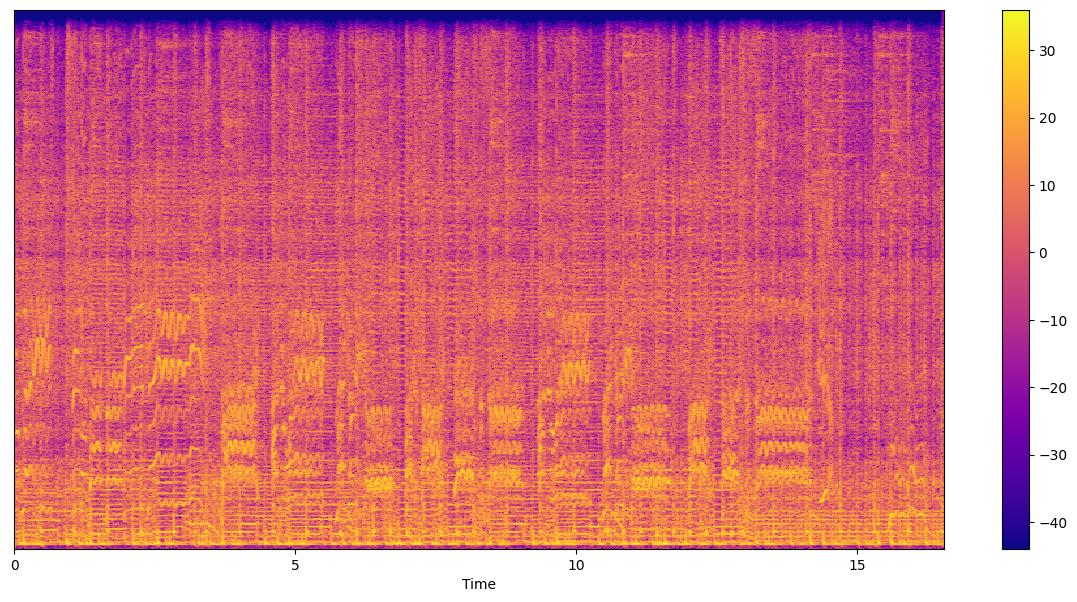

In [ ]:
stft = librosa.stft(x)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15, 7))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', cmap="plasma")
plt.colorbar()